In [5]:
! conda install eda
! conda install Clean

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.


C:\Users\RYZEN\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "

PackagesNotFoundError: The following packages are not available from current channels:

  - eda

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.


C:\Users\RYZEN\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "

PackagesNotFoundError: The following packages are not available from current channels:

  - clean

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [1]:
from os import chdir, listdir


listdir(path='../')


['.dvc',
 '.dvcignore',
 '.git',
 '.github',
 '.gitignore',
 '.travis.yml',
 '.vscode',
 'data',
 'LICENSE',
 'models',
 'notebooks',
 'Procfile',
 'README.md',
 'requirements.txt',
 'scripts',
 'setup.py',
 'setup.sh',
 'tests']

In [3]:
# importing of libraries
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from eda import EDA
from Clean import Clean
sns.set()
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)

In [6]:
# reading the csv file
training = pd.read_csv("../data/trainstore.csv",index_col=False)
testing = pd.read_csv("../data/teststore.csv",index_col=False)

In [7]:
missing_values =["n/a", "na", "undefined"]
eda_train = EDA(training)
eda_test = EDA(testing)

[07/Sep/2022 03:27:34] INFO - Successfully initialized eda class
[07/Sep/2022 03:27:34] INFO - Successfully initialized eda class


### General statistics
- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [8]:
eda_train.descriptive_stats(size=True)

[07/Sep/2022 03:29:10] INFO - Successfully performed shape


(324275, 22)

dropped records from 1,017,209 to 324,275

In [9]:
eda_test.descriptive_stats(size=True)

[07/Sep/2022 03:29:58] INFO - Successfully performed shape


(14832, 20)

In [10]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns
eda_train.descriptive_stats(describe=True)

[07/Sep/2022 03:36:20] INFO - Successfully performed describe


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,DayOfYear,WeekOfYear
count,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000
mean,558.935,3.999,5395.470,553.712,0.826,0.381,0.175,4284.873,7.191,2008.195,1.000,22.144,2011.856,15.699,5.749,2013.828,159.293,23.204
std,327.250,1.997,3485.730,361.167,0.379,0.486,0.380,5248.863,3.251,7.425,0.000,13.550,1.675,8.786,3.304,0.787,100.923,14.329
min,2.000,1.000,0.000,0.000,0.000,0.000,0.000,40.000,1.000,1900.000,1.000,1.000,2009.000,1.000,1.000,2013.000,1.000,1.000
25%,276.000,2.000,3527.000,369.000,1.000,0.000,0.000,600.000,4.000,2005.000,1.000,13.000,2011.000,8.000,3.000,2013.000,75.000,11.000
50%,563.000,4.000,5466.000,557.000,1.000,0.000,0.000,2230.000,7.000,2009.000,1.000,18.000,2012.000,16.000,5.000,2014.000,149.000,22.000
75%,848.000,6.000,7452.000,748.000,1.000,1.000,0.000,5630.000,10.000,2012.000,1.000,37.000,2013.000,23.000,8.000,2014.000,236.000,34.000
max,1111.000,7.000,24979.000,3200.000,1.000,1.000,1.000,27190.000,12.000,2015.000,1.000,48.000,2015.000,31.000,12.000,2015.000,365.000,52.000


In [11]:
eda_test.descriptive_stats(describe=True)

[07/Sep/2022 03:36:37] INFO - Successfully performed describe


,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,DayOfYear,WeekOfYear
count,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000
mean,570.689,3.979,0.850,0.396,0.470,3895.405,7.100,2008.223,1.000,23.608,2011.935,13.521,8.354,2015.000,236.500,34.646
std,322.627,2.016,0.357,0.489,0.499,4883.423,3.217,8.112,0.000,13.791,1.690,8.449,0.478,0.000,13.854,2.016
min,3.000,1.000,0.000,0.000,0.000,40.000,1.000,1900.000,1.000,1.000,2009.000,1.000,8.000,2015.000,213.000,31.000
25%,302.000,2.000,1.000,0.000,0.000,600.000,4.000,2006.000,1.000,13.000,2011.000,6.750,8.000,2015.000,224.750,33.000
50%,590.000,4.000,1.000,0.000,0.000,2070.000,7.000,2010.000,1.000,22.000,2012.000,12.500,8.000,2015.000,236.500,35.000
75%,848.000,6.000,1.000,1.000,1.000,5100.000,10.000,2012.000,1.000,37.000,2013.000,19.250,9.000,2015.000,248.250,36.000
max,1111.000,7.000,1.000,1.000,1.000,27190.000,12.000,2015.000,1.000,48.000,2015.000,31.000,9.000,2015.000,260.000,38.000


### Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

[07/Sep/2022 03:37:37] INFO - Successfully plotted distributions in the histogram formats


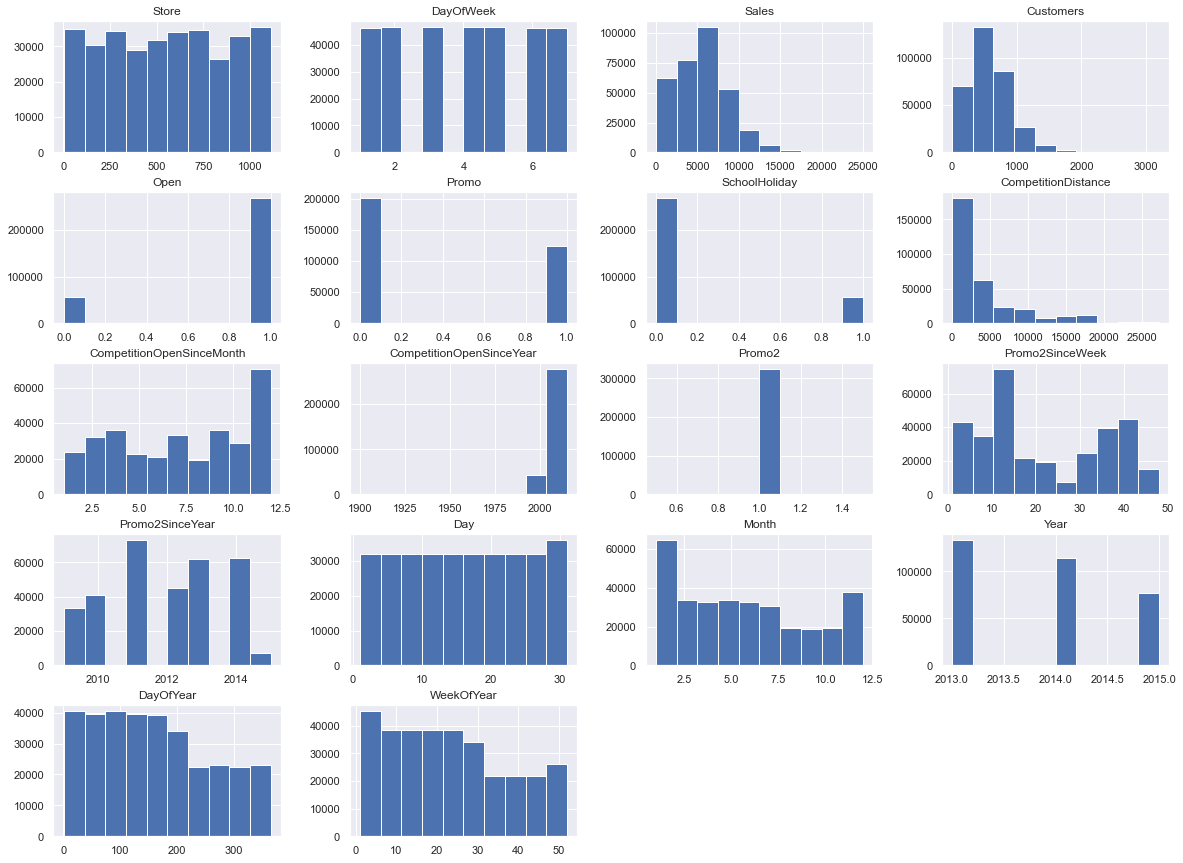

In [12]:
eda_train.plot_distributions()

[07/Sep/2022 03:37:43] INFO - Successfully plotted distributions in the histogram formats


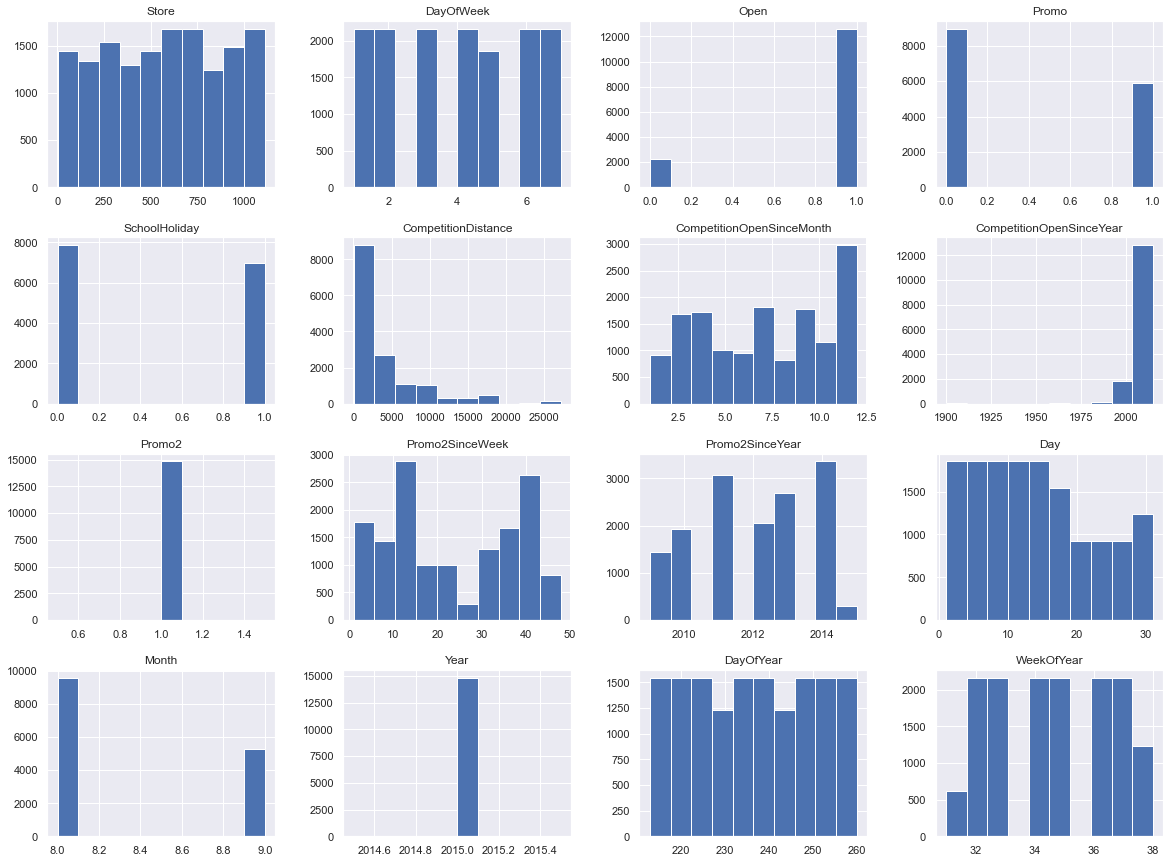

In [13]:
eda_test.plot_distributions()

Yes, but slightly.
Why do we need to check distribution between the two sets?
Maybe;;; As you see we have split our data into two sets, train and test. 
The aim or the distribution above is to show you that the two sets were split at random and subdivided and possess similar traits of promotions to ascertain the correctness of our data.
Since we aim to build a model for prediction, we will need some data to train our model to learn the customer behaviour patterns, and using statistical methods, predict sales.
To ascertain that our model will work well, we will feed the test data to the model, then analyse the results.
We can however keep training and evaluating our model to optimize predictions.


### Check & compare sales behavior before, during and after holidays

[07/Sep/2022 04:00:41] INFO - Successfully plotted bivariate scatter


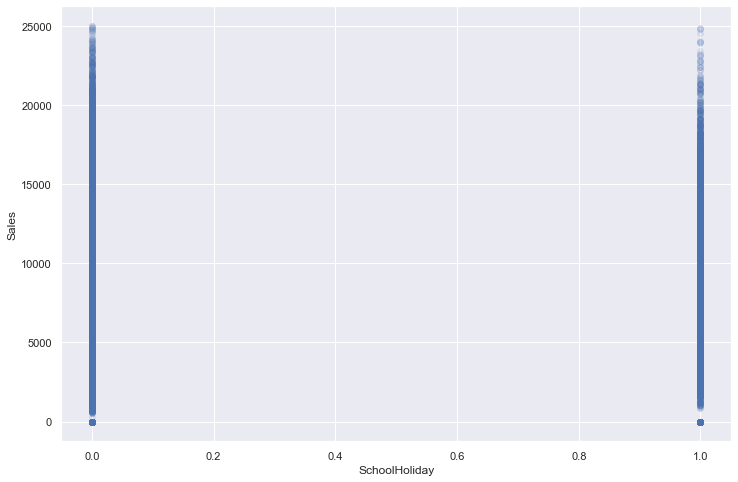

In [14]:
eda_train.plot_counts("SchoolHoliday","Sales","bivariate_scatter")

0-  no school holiday
1- there is school holiday
-Sales are more when there is no school holidays and decrease when there is a holiday.


Sales are more during when there is no school holidays, sales decrease when there is a school holiday.

[07/Sep/2022 04:03:08] INFO - Successfully plotted bivariate scatter


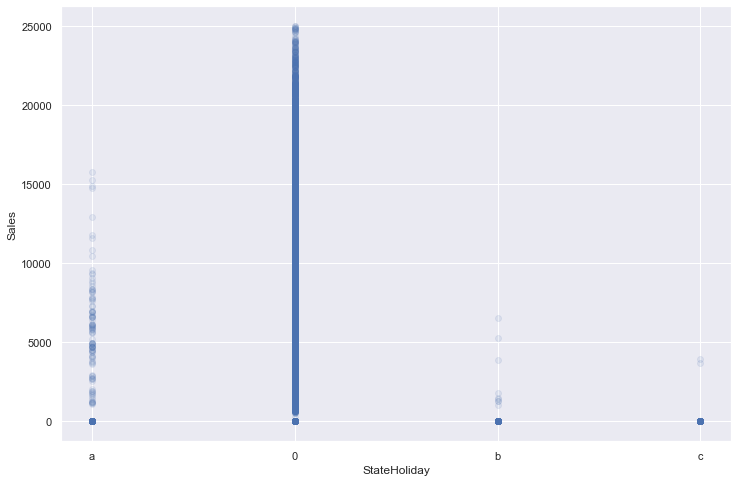

In [15]:
eda_train.plot_counts("StateHoliday","Sales","bivariate_scatter")

a = public holiday, 
b = Easter holiday, 
c = Christmas, 
0 = None.
all schools are closed on public holidays and weekends


Sales are high when there is no stateholiday, and really low, almost none during stateholidays.



### Find out any seasonal (Christmas, Easter etc) purchase behaviours,

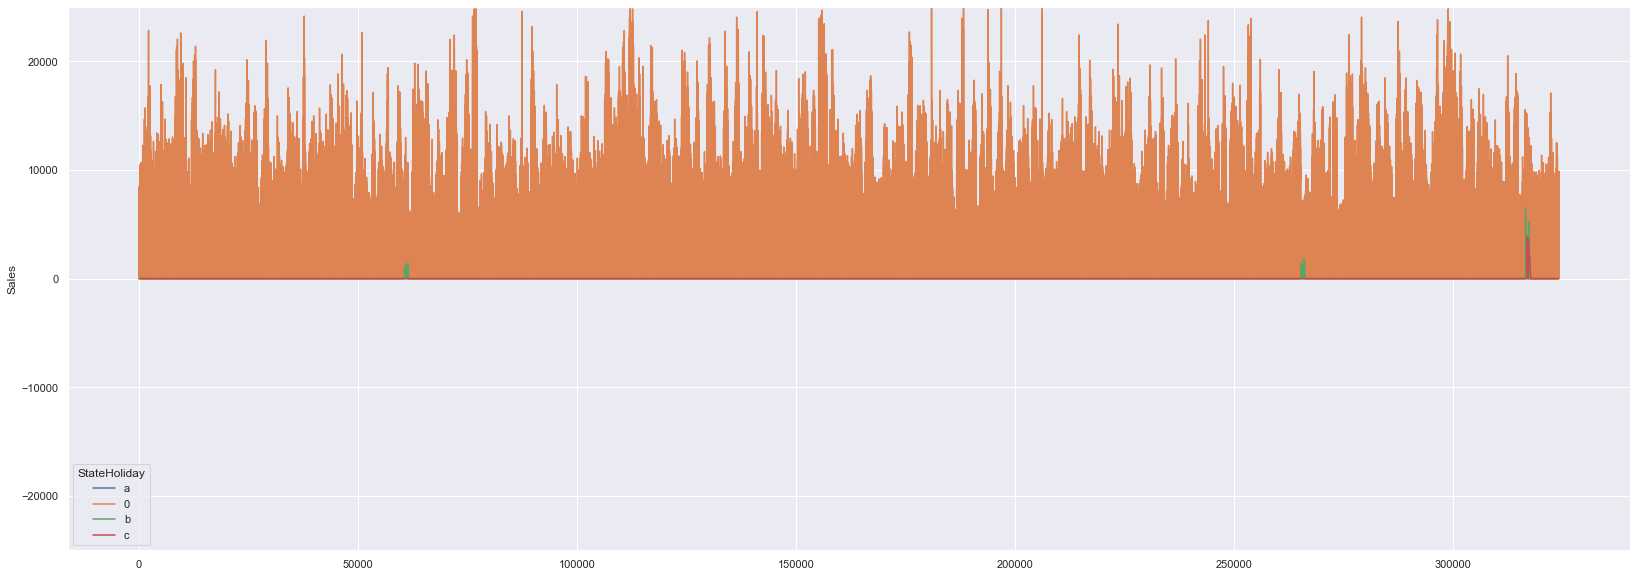

[07/Sep/2022 04:13:46] INFO - Successfully plotted bivariate line


In [16]:
eda_train.plot_counts("Sales","StateHoliday","bivariate_line")

We see that the sales are low when there is a holiday, as indicated on the green and red lines.

### What can you say about the correlation between sales and number of customers?

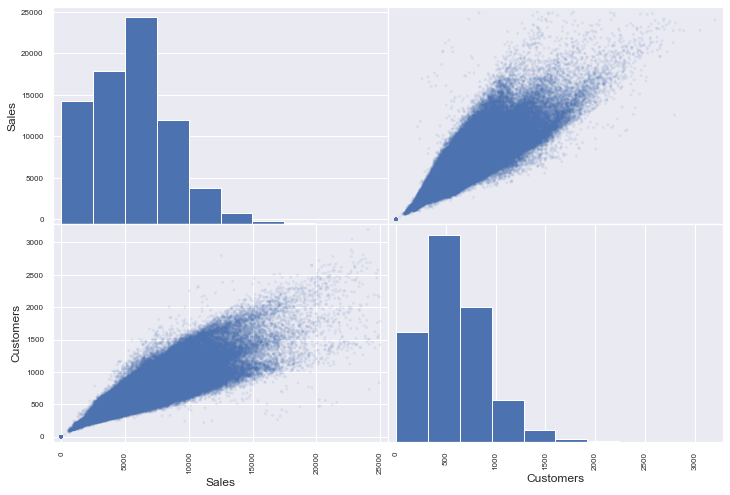

[07/Sep/2022 04:16:22] INFO - Successfully plotted correlation scatter matrix


In [17]:
eda_train.correlation_analysis("Sales", "Customers","bivariate")

There is a high correlation between the customers and the sales.
The relation is positive, that means as the customers increase, the number of sales also.


### How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

[07/Sep/2022 04:17:12] INFO - NumExpr defaulting to 8 threads.
[07/Sep/2022 04:17:12] INFO - Successfully plotted bivariate histograms


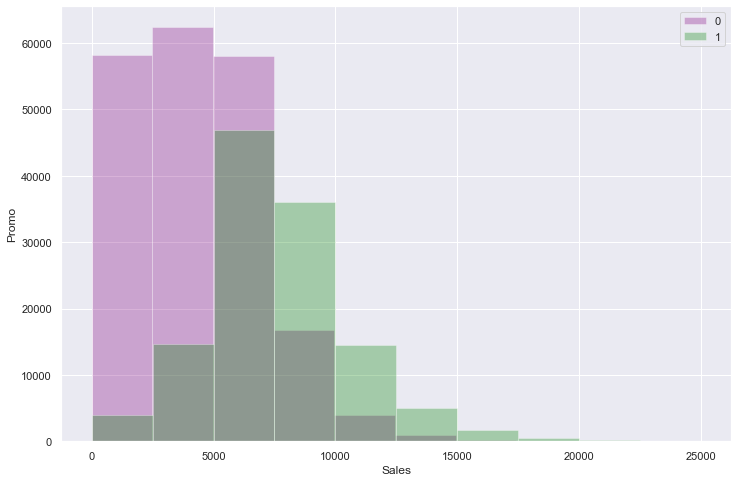

In [18]:
eda_train.plot_counts('Promo','Sales','bivariate_hist')

with=0 without=1

There is an increase in sales with more promos deployed.


[07/Sep/2022 21:57:14] INFO - Successfully plotted bivariate histograms


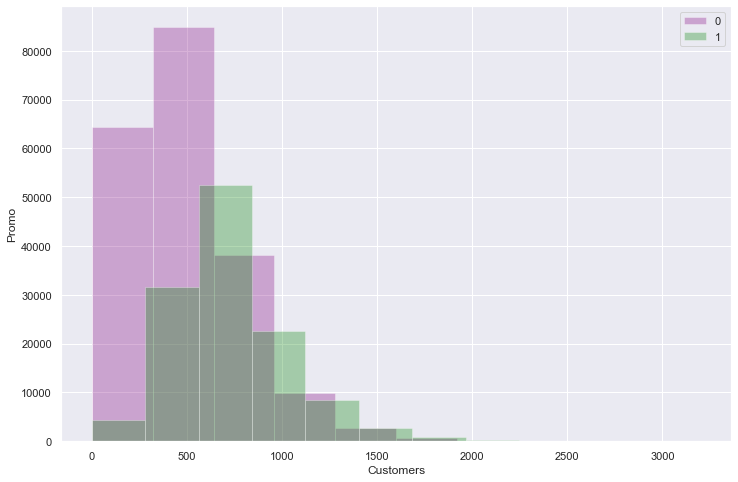

In [38]:
eda_train.plot_counts('Promo','Customers','bivariate_hist')

We see that the promotions attract customers here, 


### Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

[07/Sep/2022 04:28:16] INFO - Successfully plotted bivariate histograms


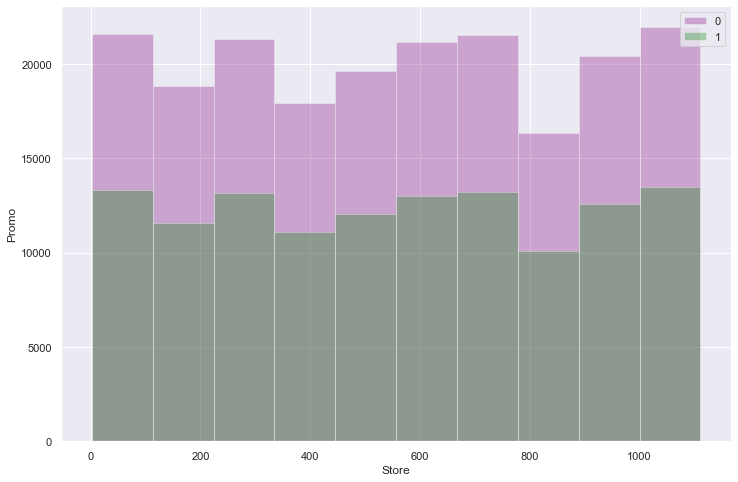

In [20]:
eda_train.plot_counts('Promo','Store','bivariate_hist')

This shows the promotion days vs the stores, and we  see that there is an increase in sales with increase in promos, hence the more promos should be made.

In [21]:
np.unique(eda_train.between('Sales',15000,20000)['Store'])

array([   3,   11,   17,   24,   27,   28,   35,   52,   54,   58,   71,
         77,   82,  102,  120,  126,  137,  140,  146,  153,  156,  162,
        164,  166,  169,  181,  192,  199,  213,  214,  223,  229,  247,
        248,  256,  261,  272,  303,  308,  319,  323,  344,  368,  370,
        371,  372,  375,  377,  380,  381,  386,  391,  400,  401,  421,
        427,  434,  449,  450,  459,  479,  489,  492,  502,  503,  506,
        507,  518,  522,  534,  536,  539,  544,  545,  552,  571,  572,
        575,  587,  603,  605,  608,  612,  613,  616,  623,  629,  636,
        641,  643,  644,  655,  657,  665,  674,  677,  685,  695,  705,
        708,  711,  720,  721,  739,  745,  753,  754,  759,  765,  775,
        784,  792,  815,  822,  835,  846,  848,  862,  868,  869,  872,
        876,  897,  914,  926,  947,  954,  967,  971,  974,  983,  985,
        986,  993,  996,  999, 1003, 1010, 1011, 1019, 1023, 1026, 1027,
       1032, 1039, 1040, 1048, 1050, 1051, 1086, 10

### Trends of customer behavior during store open and closing times

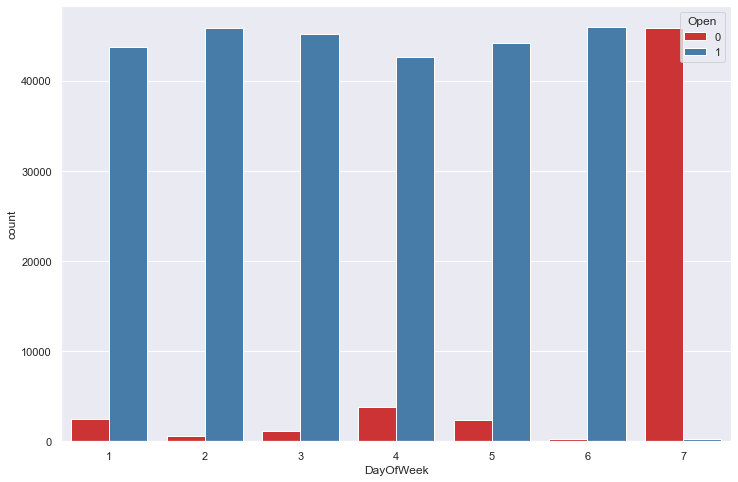

[07/Sep/2022 04:38:22] INFO - Successfully plotted bivariate countplot


In [23]:
eda_train.plot_counts('DayOfWeek','Open','bivariate_count')

Most stores are open during the weekdays and close on weekends, maybe to give workers rest.
We also see that customers tend to purchase more on mondays and fridays.


### Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [24]:
open_weekdays_df = eda_train.get_df()[(eda_train.get_df()['Open'] == 1) & (eda_train.get_df()['DayOfWeek'] < 6)]

In [25]:
open_weekdays = eda_train.get_df()[(eda_train.get_df()['Open'] == 1) & (eda_train.get_df()['DayOfWeek'] < 6)]['Store']

In [26]:
stores_open_weekdays = np.unique(open_weekdays)

In [27]:
stores_open_weekdays


array([   2,    3,   11,   14,   15,   17,   18,   20,   21,   24,   27,
         28,   30,   35,   36,   39,   46,   47,   51,   52,   54,   56,
         58,   59,   61,   63,   65,   71,   72,   77,   78,   81,   82,
         86,   89,   96,   98,   99,  102,  115,  120,  121,  126,  127,
        133,  136,  137,  139,  140,  146,  149,  153,  156,  162,  164,
        165,  166,  169,  170,  177,  181,  186,  190,  191,  192,  196,
        198,  199,  204,  209,  210,  213,  214,  223,  229,  231,  232,
        235,  242,  244,  247,  248,  254,  255,  256,  258,  261,  263,
        266,  272,  275,  276,  280,  287,  295,  296,  300,  302,  303,
        305,  306,  308,  314,  317,  319,  321,  322,  323,  325,  326,
        329,  334,  337,  343,  344,  347,  351,  356,  361,  368,  370,
        371,  372,  375,  377,  380,  381,  386,  391,  399,  400,  401,
        402,  405,  406,  407,  410,  418,  421,  427,  428,  429,  434,
        440,  446,  449,  450,  451,  452,  459,  4

In [28]:
open_weekdays_ = EDA(open_weekdays_df)

[07/Sep/2022 04:38:59] INFO - Successfully initialized eda class


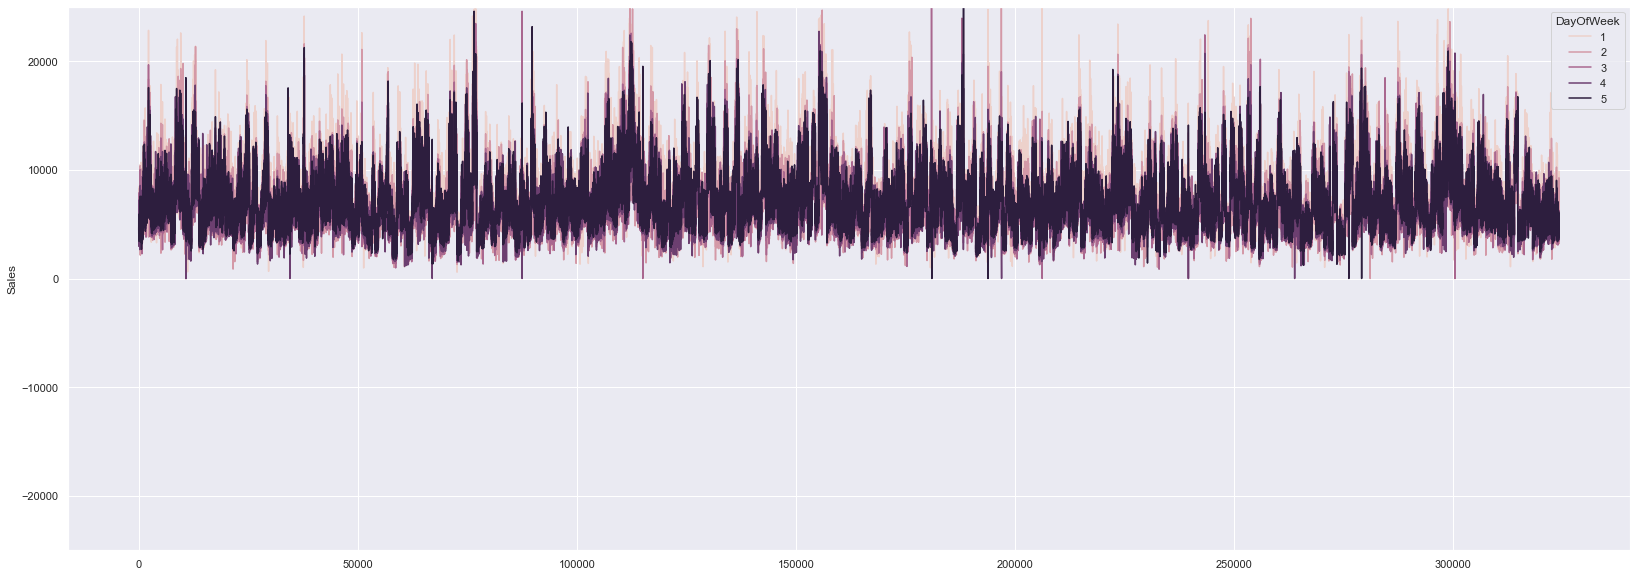

[07/Sep/2022 04:39:14] INFO - Successfully plotted bivariate line


In [29]:
open_weekdays_.plot_counts("Sales","DayOfWeek","bivariate_line")

[07/Sep/2022 04:39:19] INFO - Successfully plotted bivariate scatter


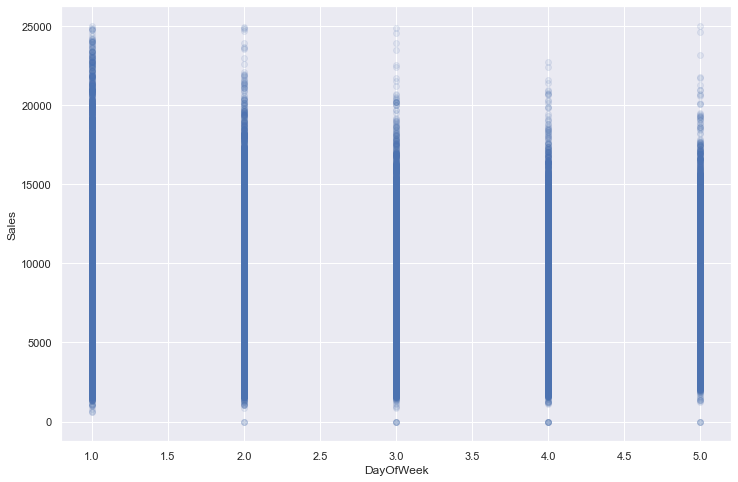

In [30]:
open_weekdays_.plot_counts("DayOfWeek","Sales","bivariate_scatter")

There are more sales on the first day of the week, Monday implying sales rise maybe due to monday blues or recovering from the weekend.
We could also say that customers prefer to refill their drugs on monday mornings, as compared to other days.


### Check how the assortment type affects sales

[07/Sep/2022 04:39:30] INFO - Successfully plotted bivariate histograms


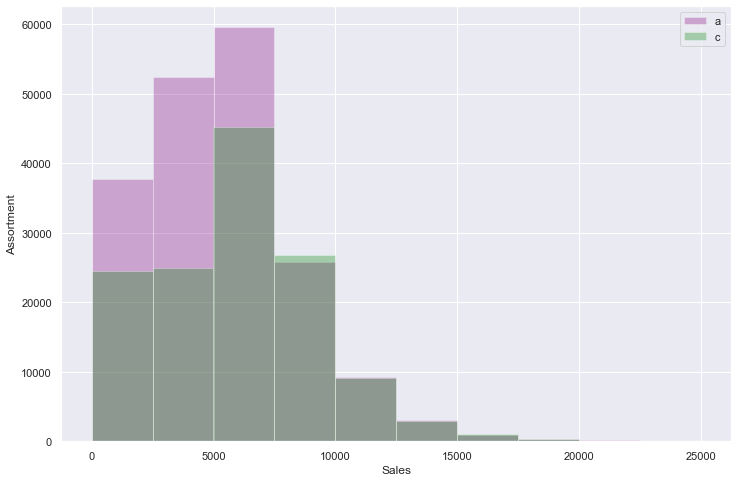

In [31]:
eda_train.plot_counts("Assortment","Sales","bivariate_hist")

Assortment a records the highest sales while c has the lowest sales, implying the efficiency of assortment type a
This can however vary depending on the store and the location.


### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centres, does the distance matter in that case?

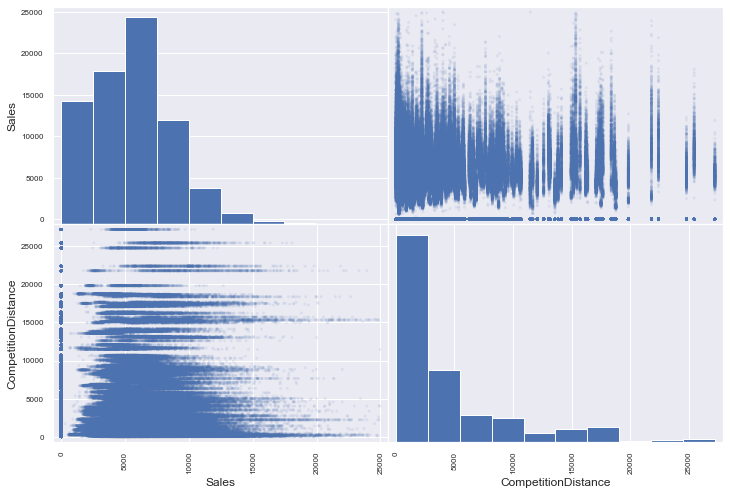

[07/Sep/2022 04:39:39] INFO - Successfully plotted correlation scatter matrix


In [32]:
eda_train.correlation_analysis("Sales", "CompetitionDistance","bivariate")

Negative correlation exists between the customers, hence the increase in distance from the competitors, leads to reduction in sales.